In [1]:
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline


In [2]:
filename="/Users/irffanalahi/Research/weekly/for_8_13_20/crc_plot/scatter_plot_pbmc/blneug50_norm_median_onefile.txt"

df=pd.read_csv(filename,sep="\t")

x=  'PBMC (This Study)'
y='cfDNA (Healthy)'
celltype="Cell Type" #"celltype"

xyfixed_lim=True

only_scatter=True

In [3]:
df.corr()

,cfDNA (CRC),cfDNA (Healthy),PBMC (This Study)
cfDNA (CRC),1.000000,0.992470,0.864619
cfDNA (Healthy),0.992470,1.000000,0.909985
PBMC (This Study),0.864619,0.909985,1.000000


In [4]:
corr = pearsonr(df[x], df[y])

#corr = [np.round(c, 5) for c in corr]
print(corr)
text='r = %s \nP = %s' % (format(corr[0], '.3f'), format(corr[1], ".3e") )

(0.9099851528676709, 0.031978092653562294)


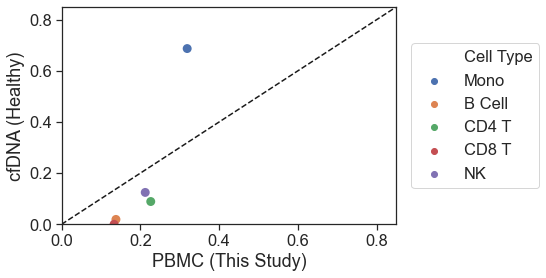

In [5]:
#sns.set(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1.5, color_codes=False, rc=None)
sns.set(style="ticks",font_scale=1.5)
if xyfixed_lim==True:
    plt.xlim([0, 0.85])
    plt.ylim([0, 0.85])
    
    linex = np.linspace(0,.85 , 1000)
    liney=linex

g=sns.scatterplot(df[x], df[y],hue=df[celltype],edgecolor='none',s=80)
g.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

if only_scatter==False:
    ax=sns.regplot(df[x], df[y],scatter=False)




    anc = AnchoredText(text, loc="upper left", frameon=False,prop=dict(fontstyle="italic"))
    ax.add_artist(anc)


plt.plot(linex, liney, '--k')   
    
#default 12
plt.rcParams["axes.labelsize"] = 14
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']




#hfont = {'fontname':'Helvetica'}
#plt.title('title',**hfont)

savename=filename+"_"+x+"_"+y+".pdf"
plt.savefig(savename,dpi=300,bbox_inches="tight")
plt.show()
#sns.jointplot(data=df, x=x, y=y, kind='reg', hue=df[celltype])